In [13]:
import cudaq
from typing import List
import matplotlib.pyplot as plt
import math

cudaq.set_target("nvidia")

In [19]:
# Initialize a kernel/ ansatz and variational parameters.
@cudaq.kernel
def kernel(angles: List[float]):
    # Allocate a qubit that is initialized to the |0> state.
    qubit = cudaq.qubit()
    # Define gates and the qubits they act upon.
    rx(angles[0], qubit)
    ry(angles[1], qubit)

# Initial gate parameters which intialize the qubit in the zero state
initial_parameters = [0, 0]

print(cudaq.draw(kernel, initial_parameters))

     ╭───────╮╭───────╮
q0 : ┤ rx(0) ├┤ ry(0) ├
     ╰───────╯╰───────╯



In [49]:
cost_values = []
params = []

# Our Hamiltonian will be the Z expectation value of our qubit.
hamiltonian = cudaq.spin.z(0)

def cost(parameters):
    """Returns the expectation value as our cost."""
    expectation_value = cudaq.observe(kernel, cudaq.SpinOperator.from_word("x"),
                                      parameters).expectation()
    cost_values.append(expectation_value)
    params.append((parameters, expectation_value))
    return expectation_value

# We see that the initial value of our cost function is one, demonstrating that our qubit is in the zero state
initial_cost_value = cost(initial_parameters)
print(initial_cost_value)

0.0


In [40]:
spin_op = cudaq.SpinOperator.from_word("I")
print(spin_op.to_matrix())

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [50]:
optimizer = cudaq.optimizers.COBYLA()
optimizer.initial_parameters = initial_parameters

result = optimizer.optimize(dimensions=2, function=cost)

0 ([0, 0], 0.0)
1 ([0.0, 0.0], 0.0)
2 ([1.5707963267948966, 0.0], 0.0)
3 ([0.0, 1.5707963267948966], 0.9999999403953552)
4 ([0.0, -1.5707963267948966], -0.9999999403953552)
5 ([0.0, -3.141592653589793], 8.742277657347586e-08)
6 ([0.0, -3.141592653589793], 8.742277657347586e-08)
7 ([0.0, -2.356194490192345], -0.7071067690849304)
8 ([-0.21448434691624832, -1.5707963267948966], -0.9770861864089966)
9 ([0.2162939195985284, -0.8157683700854842], -0.7112836837768555)
10 ([-0.38882901712368906, -1.5158002886680721], -0.9239545464515686)
11 ([0.10882599634575661, -1.4073642469846321], -0.9808378219604492)
12 ([0.11506971863045111, -1.7298941019083913], -0.9808409214019775)
13 ([-0.09815627301353626, -1.5727020067341722], -0.9951847791671753)
14 ([0.015901787928061004, -1.6172366597790138], -0.9987956881523132)
15 ([0.036849692780607436, -1.5383668413077731], -0.9987956881523132)
16 ([-0.023721254950259636, -1.5644959370981428], -0.99969881772995)
17 ([0.006664300899793541, -1.5604917013672763]

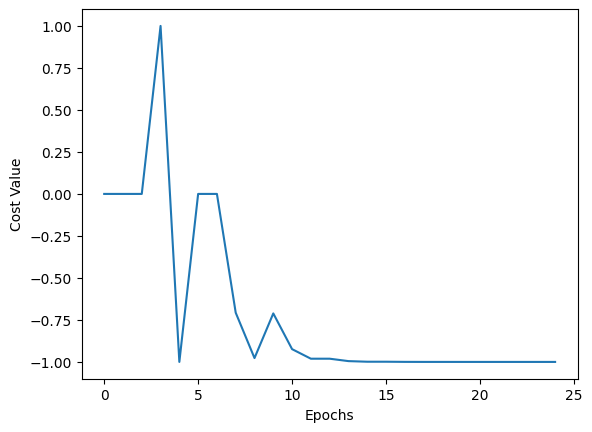

In [51]:
x_values = list(range(len(cost_values)))
y_values = cost_values

plt.plot(x_values, y_values)

plt.xlabel("Epochs")
plt.ylabel("Cost Value")

for i in range(len(params)):
    print(i, params[i])